First, we must load the cleaned dataset as a dataframe and begin exploring the data. 

In [9]:
import pandas as pd
df = pd.read_csv('/Users/amyaragon/Desktop/NPS Data/park_visitation_data.csv')
df.head()

,Park Name,5 Year Visitation Total,Latitude,Longitude,Distance to Highway (miles),Distance to Nearest Airport (miles),Number of Lodging Accommodations (within 31 miles)
0,Denali National Park,1811807,63.231662,-151.040555,70.403985,21.520031,6
1,Gates of the Arctic National Park,41254,67.750841,-153.247456,88.336116,NaN,0
2,Glacier Bay National Park,2017020,58.814175,-136.872094,90.158590,NaN,0
3,Katmai National Park,228113,58.504984,-155.089623,66.318978,NaN,3
4,Kenai Fjords National Park,1661733,59.868563,-150.025771,90.980396,27.854519,20


In [10]:
df.describe()

,5 Year Visitation Total,Latitude,Longitude,Distance to Highway (miles),Distance to Nearest Airport (miles),Number of Lodging Accommodations (within 31 miles)
count,6.300000e+01,63.000000,63.000000,63.000000,55.000000,63.000000
mean,6.861059e+06,39.702660,-112.103925,74.775207,19.681795,17.317460
std,9.746876e+06,12.761522,23.958010,23.618455,6.646592,6.278035
min,4.125400e+04,-14.249130,-169.449040,14.830762,5.021953,0.000000
25%,1.604948e+06,34.751774,-121.405275,65.666330,14.711641,20.000000
50%,3.109998e+06,38.233259,-110.618345,84.104911,21.141256,20.000000
75%,7.718706e+06,44.488200,-97.695902,91.982955,24.343758,20.000000
max,6.504029e+07,67.750841,-64.740012,100.427250,31.009432,20.000000


We will use a heat map visualization to easily see where the missing values are within this dataset. 

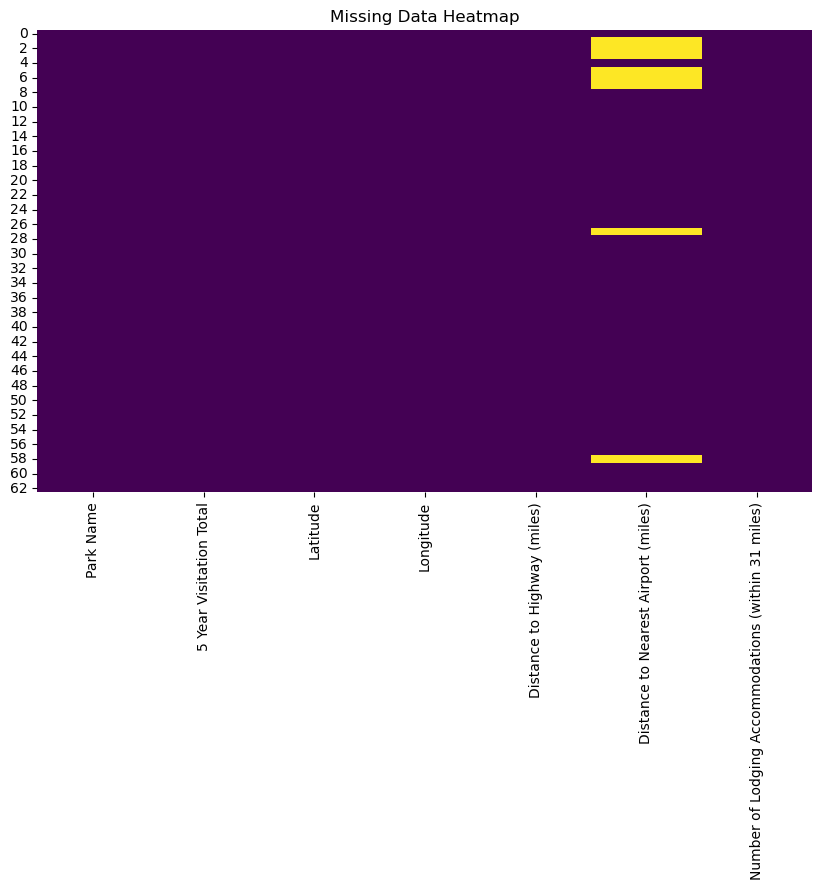

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot missing data heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

The only category with missing values is the "Distance to Nearest Airport (miles)", meaning that there are National Parks in the dataset that do not have an airport within 31 miles. We will explore whether this impacts visitation numbers compared to parks that do have a nearby airport. 

In [12]:
# Create a new column to label parks with missing airport data
df['Missing Airport Data'] = df['Distance to Nearest Airport (miles)'].isnull()

# Check if the new column is created correctly
df[['Park Name', 'Distance to Nearest Airport (miles)', 'Missing Airport Data']].head()

,Park Name,Distance to Nearest Airport (miles),Missing Airport Data
0,Denali National Park,21.520031,False
1,Gates of the Arctic National Park,NaN,True
2,Glacier Bay National Park,NaN,True
3,Katmai National Park,NaN,True
4,Kenai Fjords National Park,27.854519,False


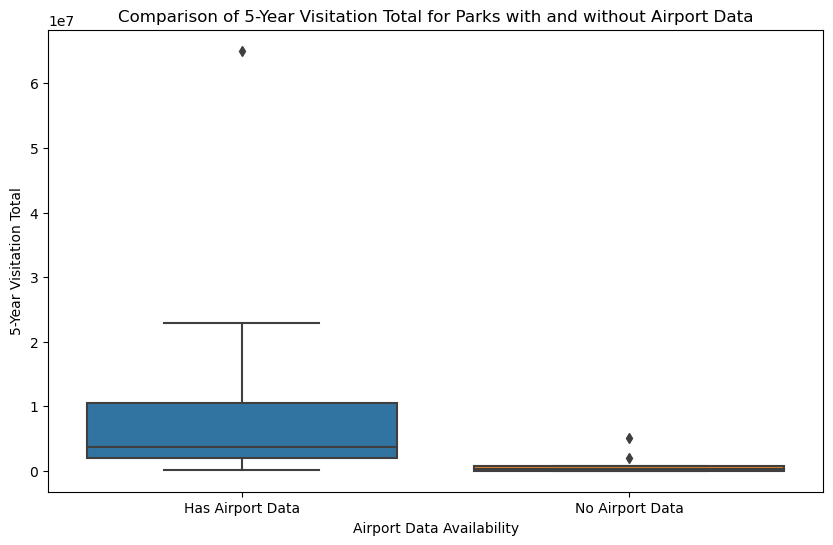

In [13]:
# Visitation comparison
# Boxplot comparing visitation between parks with and without airport data
plt.figure(figsize=(10, 6))
sns.boxplot(x='Missing Airport Data', y='5 Year Visitation Total', data=df)
plt.xticks([0, 1], ['Has Airport Data', 'No Airport Data'])  # Adjust labels for x-axis
plt.title('Comparison of 5-Year Visitation Total for Parks with and without Airport Data')
plt.xlabel('Airport Data Availability')
plt.ylabel('5-Year Visitation Total')
plt.show()


In [14]:
from scipy import stats 
# Checking for a significant difference between both groups
has_airport_data = df[df['Missing Airport Data'] == False]['5 Year Visitation Total']
no_airport_data = df[df['Missing Airport Data'] == True]['5 Year Visitation Total']

# Independent t-test
t_stat, p_value = stats.ttest_ind(has_airport_data, no_airport_data, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 4.428647496646941
P-value: 4.18780710769701e-05


The p-value is much smaller than 0.05, meaning that there is a statistically significant difference between visitation at parks with no nearby airport, and parks that do have an airport within 31 miles. 

In [15]:
from scipy.stats import pearsonr

# Will not include the parks with missing airport data in the calculation
df_no_na = df.dropna(subset=['Distance to Nearest Airport (miles)'])
correlations = ['Distance to Highway (miles)', 'Distance to Nearest Airport (miles)', 'Number of Lodging Accommodations (within 31 miles)']

# Create an empty dictionary to store results
correlation_results = {}

for var in correlations:
    # Calculate the Pearson correlation coefficient and p-value
    corr, p_val = pearsonr(df_no_na[var], df_no_na['5 Year Visitation Total'])
    
    # Store the results in the dictionary
    correlation_results[var] = {'correlation': corr, 'p_value': p_val}

# Display the results
for var, result in correlation_results.items():
    print(f"{var}: Pearson correlation = {result['correlation']:.4f}, p-value = {result['p_value']:.4f}")

Distance to Highway (miles): Pearson correlation = -0.0296, p-value = 0.8299
Distance to Nearest Airport (miles): Pearson correlation = 0.0952, p-value = 0.4894
Number of Lodging Accommodations (within 31 miles): Pearson correlation = 0.1552, p-value = 0.2579



For the p-values to show significance, they would need to be less than 0.05. Based on the Pearson correlation, none are showing statistical significance. 

                               OLS Regression Results                              
Dep. Variable:     5 Year Visitation Total   R-squared:                       0.031
Model:                                 OLS   Adj. R-squared:                 -0.026
Method:                      Least Squares   F-statistic:                    0.5450
Date:                     Wed, 25 Dec 2024   Prob (F-statistic):              0.654
Time:                             14:35:09   Log-Likelihood:                -963.95
No. Observations:                       55   AIC:                             1936.
Df Residuals:                           51   BIC:                             1944.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

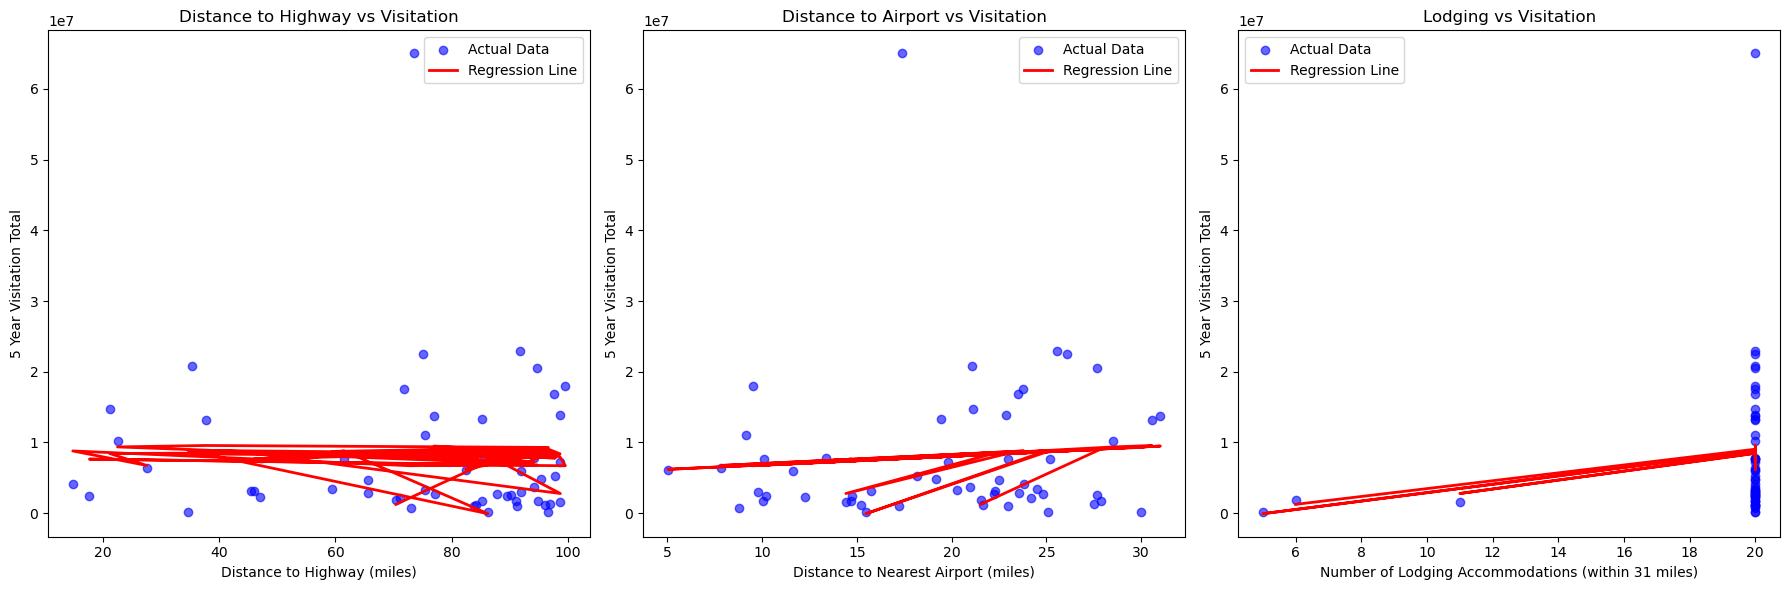

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

# Define the independent variables (X) and dependent variable (y)
X = df_no_na[['Distance to Highway (miles)', 'Distance to Nearest Airport (miles)', 'Number of Lodging Accommodations (within 31 miles)']]
y = df_no_na['5 Year Visitation Total']

# Add constant to the model for intercept
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

# Predict the values using the model
y_pred = model.predict(X)

# Create a subplot for each variable
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for 'Distance to Highway (miles)'
axes[0].scatter(df_no_na['Distance to Highway (miles)'], y, color='blue', label='Actual Data', alpha=0.6)
axes[0].plot(df_no_na['Distance to Highway (miles)'], y_pred, color='red', label='Regression Line', linewidth=2)
axes[0].set_xlabel('Distance to Highway (miles)')
axes[0].set_ylabel('5 Year Visitation Total')
axes[0].set_title('Distance to Highway vs Visitation')
axes[0].legend()

# Plot for 'Distance to Nearest Airport (miles)'
axes[1].scatter(df_no_na['Distance to Nearest Airport (miles)'], y, color='blue', label='Actual Data', alpha=0.6)
axes[1].plot(df_no_na['Distance to Nearest Airport (miles)'], y_pred, color='red', label='Regression Line', linewidth=2)
axes[1].set_xlabel('Distance to Nearest Airport (miles)')
axes[1].set_ylabel('5 Year Visitation Total')
axes[1].set_title('Distance to Airport vs Visitation')
axes[1].legend()


# Plot for 'Number of Lodging Accommodations (within 31 miles)'
axes[2].scatter(df_no_na['Number of Lodging Accommodations (within 31 miles)'], y, color='blue', label='Actual Data', alpha=0.6)
axes[2].plot(df_no_na['Number of Lodging Accommodations (within 31 miles)'], y_pred, color='red', label='Regression Line', linewidth=2)
axes[2].set_xlabel('Number of Lodging Accommodations (within 31 miles)')
axes[2].set_ylabel('5 Year Visitation Total')
axes[2].set_title('Lodging vs Visitation')
axes[2].legend()

plt.tight_layout()

# Show plot
plt.show()

No linear relationships are found with these variables and visitation numbers. Let's calculate a z-score for the dataset to determine if there are outliers, as this may be skewing the results.

In [17]:
# Calculate the Z-scores for the '5 Year Visitation Total'
df_no_na['Z-Score'] = (df_no_na['5 Year Visitation Total'] - df_no_na['5 Year Visitation Total'].mean()) / df_no_na['5 Year Visitation Total'].std()

# Identify the park(s) with Z-scores greater than 3 or less than -3
outliers = df_no_na[df_no_na['Z-Score'].abs() > 3]
print(outliers)

                              Park Name  5 Year Visitation Total  Latitude  \
60  Great Smoky Mountains National Park                 65040291  35.63422   

    Longitude  Distance to Highway (miles)  \
60 -83.402366                    73.469691   

    Distance to Nearest Airport (miles)  \
60                            17.380094   

    Number of Lodging Accommodations (within 31 miles)  Missing Airport Data  \
60                                                 20                  False   

     Z-Score  
60  5.651944  


/var/folders/0h/wmz0x7y504jdhmphp2g8snb40000gn/T/ipykernel_53695/3764953024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_na['Z-Score'] = (df_no_na['5 Year Visitation Total'] - df_no_na['5 Year Visitation Total'].mean()) / df_no_na['5 Year Visitation Total'].std()


Now, we will remove the outlier and re-run the model to see if this significantly impacts the results.

In [18]:
df_no_outlier = df_no_na[df_no_na['Park Name'] != 'Great Smoky Mountains National Park']

                               OLS Regression Results                              
Dep. Variable:     5 Year Visitation Total   R-squared:                       0.080
Model:                                 OLS   Adj. R-squared:                  0.025
Method:                      Least Squares   F-statistic:                     1.455
Date:                     Wed, 25 Dec 2024   Prob (F-statistic):              0.238
Time:                             14:36:31   Log-Likelihood:                -920.60
No. Observations:                       54   AIC:                             1849.
Df Residuals:                           50   BIC:                             1857.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

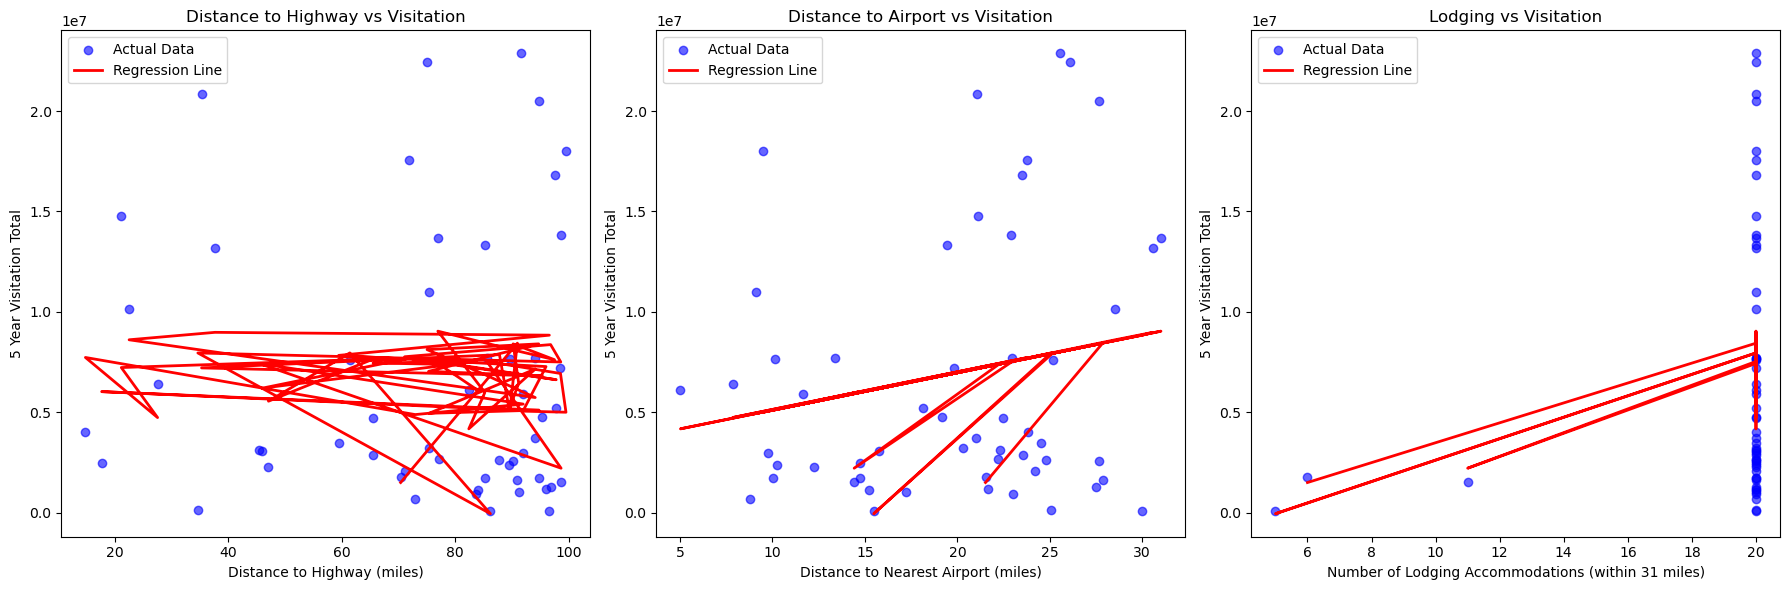

In [19]:
# Define the independent variables (X) and dependent variable (y)
X = df_no_outlier[['Distance to Highway (miles)', 'Distance to Nearest Airport (miles)', 'Number of Lodging Accommodations (within 31 miles)']]
y = df_no_outlier['5 Year Visitation Total']

# Add constant to the model for intercept
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

# Predict the values using the model
y_pred = model.predict(X)

# Create a subplot for each variable
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for 'Distance to Highway (miles)'
axes[0].scatter(df_no_outlier['Distance to Highway (miles)'], y, color='blue', label='Actual Data', alpha=0.6)
axes[0].plot(df_no_outlier['Distance to Highway (miles)'], y_pred, color='red', label='Regression Line', linewidth=2)
axes[0].set_xlabel('Distance to Highway (miles)')
axes[0].set_ylabel('5 Year Visitation Total')
axes[0].set_title('Distance to Highway vs Visitation')
axes[0].legend()

# Plot for 'Distance to Nearest Airport (miles)'
axes[1].scatter(df_no_outlier['Distance to Nearest Airport (miles)'], y, color='blue', label='Actual Data', alpha=0.6)
axes[1].plot(df_no_outlier['Distance to Nearest Airport (miles)'], y_pred, color='red', label='Regression Line', linewidth=2)
axes[1].set_xlabel('Distance to Nearest Airport (miles)')
axes[1].set_ylabel('5 Year Visitation Total')
axes[1].set_title('Distance to Airport vs Visitation')
axes[1].legend()


# Plot for 'Number of Lodging Accommodations (within 31 miles)'
axes[2].scatter(df_no_outlier['Number of Lodging Accommodations (within 31 miles)'], y, color='blue', label='Actual Data', alpha=0.6)
axes[2].plot(df_no_outlier['Number of Lodging Accommodations (within 31 miles)'], y_pred, color='red', label='Regression Line', linewidth=2)
axes[2].set_xlabel('Number of Lodging Accommodations (within 31 miles)')
axes[2].set_ylabel('5 Year Visitation Total')
axes[2].set_title('Lodging vs Visitation')
axes[2].legend()

plt.tight_layout()

# Show plot
plt.show()

To double check if multicollinearity is impacting the results, we will calculate the variance inflaction factor. 

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                                             feature        VIF
0                                              const  64.477821
1                        Distance to Highway (miles)   1.017430
2                Distance to Nearest Airport (miles)   1.016782
3  Number of Lodging Accommodations (within 31 mi...   1.012652


Multicollinearity is not in issues based on the VIF results. The VIF for all factors is close to 1, so there is no significant correlation between the predictor variables that would cause multicollinearity. 